# Bike sharing data set EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [52]:
df = pd.read_csv("../data/bike_sharing.csv", header=0)

In [53]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1.0


In [54]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10877.000000,10866.000000,10873.000000,10874.000000,10858.000000,10842.000000,10856.000000,10866.000000,10839.000000,10879.000000,10863.000000
mean,2.506298,0.028621,0.680861,1.418429,20.229335,23.657311,61.867999,12.800774,36.061722,155.590312,191.620087
std,1.116298,0.166748,0.466164,0.633977,7.794811,8.475323,19.246286,8.165985,49.990709,151.059659,181.114090
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,43.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [87]:
def compute_rental_station_data(df):
    result = []
    for rental_station_id in range(1, 14):
        num_samples = np.random.randint(100, 2000)
        result.extend([rental_station_id] * num_samples)
    result = np.array(result).flatten()
    np.random.shuffle(result)
    result = result[:len(df)]
    return result

In [88]:
df["rental_station_id"] = compute_rental_station_data(df)

# Questions:
1. Is any data missing or corrupted? How would you deal with this?
2. What is the most popular time to rent out bikes?
5. How do holidays influence bike rental numbers?
3. How does the weather affect the bike rental numbers?
4. What is the most popular bike rental station?

## Q1: Missing or corrupted data?

In [55]:
df.isnull().values.any()

True

In [56]:
df[df.isna().any(axis=1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
38,2011-01-02 15:00:00,1.0,0.0,0.0,3.0,13.94,16.665,81.0,11.0014,19.0,55.0,NaN
116,2011-01-06 01:00:00,1.0,0.0,1.0,1.0,6.56,11.365,64.0,NaN,0.0,4.0,4.0
156,2011-01-07 19:00:00,1.0,0.0,1.0,1.0,6.56,9.850,55.0,6.0032,NaN,92.0,95.0
222,2011-01-10 13:00:00,1.0,0.0,1.0,2.0,8.20,9.090,NaN,19.0012,4.0,50.0,54.0
270,2011-01-12 17:00:00,1.0,0.0,1.0,1.0,NaN,9.090,47.0,23.9994,0.0,139.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10747,2012-12-14 05:00:00,4.0,0.0,1.0,1.0,8.20,11.365,69.0,NaN,0.0,34.0,34.0
10784,2012-12-15 18:00:00,4.0,0.0,0.0,1.0,15.58,19.695,NaN,11.0014,40.0,232.0,272.0
10791,2012-12-16 01:00:00,4.0,0.0,0.0,3.0,13.94,17.425,76.0,7.0015,NaN,82.0,96.0
10841,2012-12-18 03:00:00,4.0,0.0,NaN,1.0,17.22,21.210,88.0,12.9980,0.0,5.0,5.0


In [93]:
# drop missing columns if you like (only ok for this exercise!)
df.dropna(axis=0, inplace=True)

### Dealing with missing / NaN values
Looking at the dataframe above, we can see there are some NaN values. The question now is: how do we deal with these?
For some columns we could actually fill in the missing values:
- for casual, registered and count we could calculate a missing value if we have the other two
- for season we could look at datetime and determine it ourselves
- same goes for working day and holiday (if we know the location of reference for the data set)
- we could also check out weather information for the day to figure out the temp, atemp, humidity and windspeed
- missing datetimes could be added by looking at the sampling rate of the data (hourly)

In [94]:
df["rental_station_id"].value_counts()

8     1488
12    1401
9     1217
6     1086
7      964
2      858
5      833
4      659
13     621
10     607
3      501
1      268
11      89
Name: rental_station_id, dtype: int64

<AxesSubplot:xlabel='rental_station_id', ylabel='Count'>

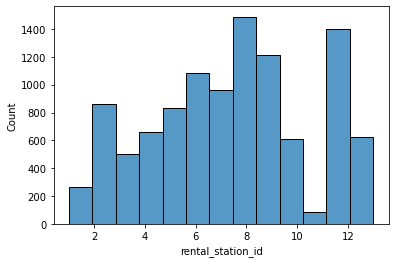

In [98]:
sns.histplot(data=df, x="rental_station_id", bins=13)

In [90]:
df.to_csv("../data/bike_sharing.csv", header=True, index=False)